In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
modi = pd.read_csv('D:/study/datasets/narendramodi_tweets.csv')

In [41]:
modi.head()
modi.shape

(3220, 14)

In [7]:
min(modi['created_at'])
modi.created_at.min()

'2016-03-09 12:22:10'

In [8]:
max(modi['created_at'])
modi.created_at.max()

'2017-01-31 11:00:07'

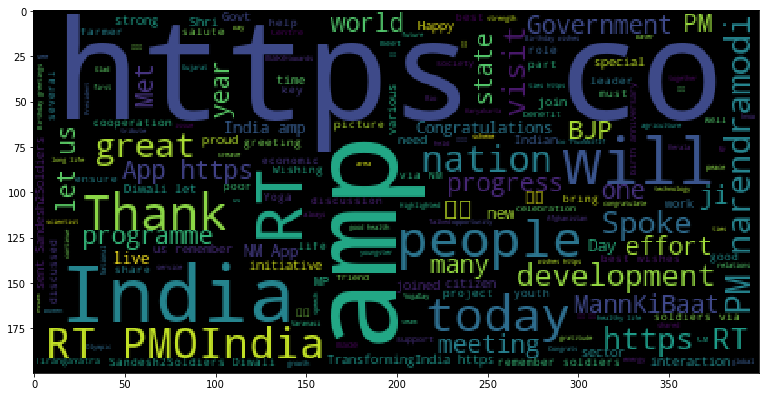

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_string = ' '.join(modi['text'])
wc = WordCloud(background_color='black').generate(input_string)
plt.figure(figsize=(13,8))
plt.imshow(wc)

In [13]:
docs =modi['text'].str.lower().str.replace('[^a-z#@ ]', '')

In [14]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords
len(stopwords) 

179

In [15]:
docs.head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

In [16]:
# now we will remove stopwords from our reviews
stemmer = nltk.stem.PorterStemmer()
docs_clean = []
for doc in docs.head():
    words = doc.split(' ')
    #print(doc)
    #print(words)
    words_clean = []
    for word in words:
        if word not in stopwords:
            words_clean.append(stemmer.stem(word))
    doc_clean = ' '.join(words_clean)
    docs_clean.append(doc_clean)
print(docs_clean)

['presid address wonder encapsul india strength aspir potenti amp effort toward #transformingindia', 'rashtrapati ji address hous parliament indepth amp extens hear httpstcordkqtjgnnx @rashtrapatibhvn', 'rt @pmoindia empow marginalis httpstcowwsqgwdk', 'rt @pmoindia commit welfar farmer httpstcopaafrfmrc', 'rt @pmoindia improv qualiti life poor httpstcougmvkz']


In [17]:
def clean_sentences(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentences)
docs_clean

0       presid address wonder encapsul india strength ...
1       rashtrapati ji address hous parliament indepth...
2          rt @pmoindia empow marginalis httpstcowwsqgwdk
3       rt @pmoindia commit welfar farmer httpstcopaaf...
4       rt @pmoindia improv qualiti life poor httpstco...
5       rt @pmoindia financi inclus poverti allevi htt...
6       rt @rashtrapatibhvn fourdecad old demand onera...
7       rt @rashtrapatibhvn govern taken bold decis in...
8       rt @rashtrapatibhvn proactiv act east polici g...
9       rt @rashtrapatibhvn standup india initi govt p...
10      rt @rashtrapatibhvn pradhan mantri fasal bima ...
11      rt @rashtrapatibhvn govern taken variou step t...
12      rt @rashtrapatibhvn govern commit provid shelt...
13      rt @rashtrapatibhvn govern taken mani initi im...
14      rt @rashtrapatibhvn core govt polici welfar ga...
15      rt @rashtrapatibhvn janashakti transform swach...
16      rt @rashtrapatibhvn resili amp forbear demonst...
17      rt @ra

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=5)
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)

In [28]:
dtm

<3220x1228 sparse matrix of type '<class 'numpy.int64'>'
	with 24800 stored elements in Compressed Sparse Row format>

In [29]:
dtm.shape

(3220, 1228)

In [30]:
no_of_zeroes = (3220 * 7342) - 33409
sparsity = (no_of_zeroes)/(3220 * 7342) *100
sparsity

99.85868338547385

In [31]:
df_dtm = pd.DataFrame(dtm.toarray(),
                     columns=vectorizer.get_feature_names())

In [32]:
df_dtm

,aadhaar,abeshinzo,abhiyan,absolut,access,accomplish,account,achiev,across,act,...,year,yesterday,yoga,yogaday,yogrishiramdev,yojana,young,youngster,youth,zay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# to find total number of zeros
(df_dtm ==0).sum().sum()

3929360

In [34]:
df_dtm.sum().sort_values(ascending = False).head(2)

amp    1480
rt      573
dtype: int64

In [35]:
df_dtm.sum(axis=1).sort_values(ascending=False).head(2)

3000    19
679     17
dtype: int64

In [38]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, random_state=100)
km.fit(df_dtm)
km.labels_

array([3, 3, 1, ..., 3, 3, 3])

In [45]:
modi['labels']=km.labels_
modi['labels'].value_counts()

3    2391
1     449
2     262
0     118
Name: labels, dtype: int64

In [48]:
df1 = modi[modi['labels']==0]
df2 = modi[modi['labels']==1]
df3 = modi[modi['labels']==2]
df4 = modi[modi['labels']==3]

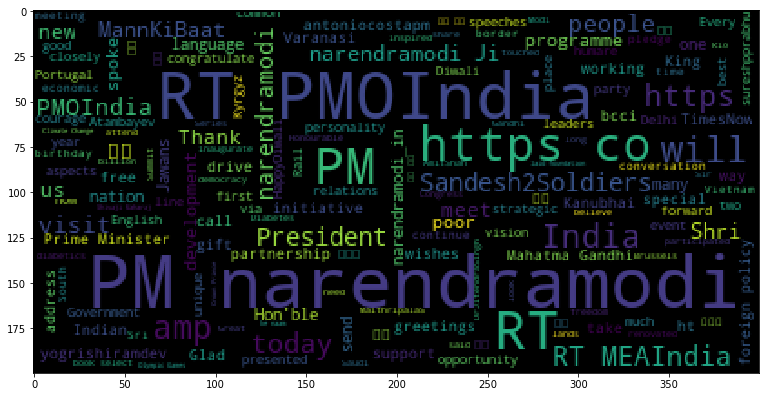

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_string = ' '.join(df1['text'])
wc = WordCloud(background_color='black').generate(input_string)
plt.figure(figsize=(13,8))
plt.imshow(wc)

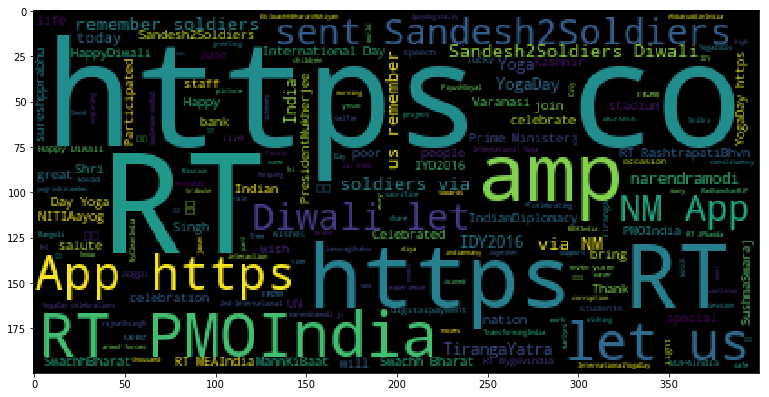

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_string = ' '.join(df2['text'])
wc = WordCloud(background_color='black').generate(input_string)
plt.figure(figsize=(13,8))
plt.imshow(wc)

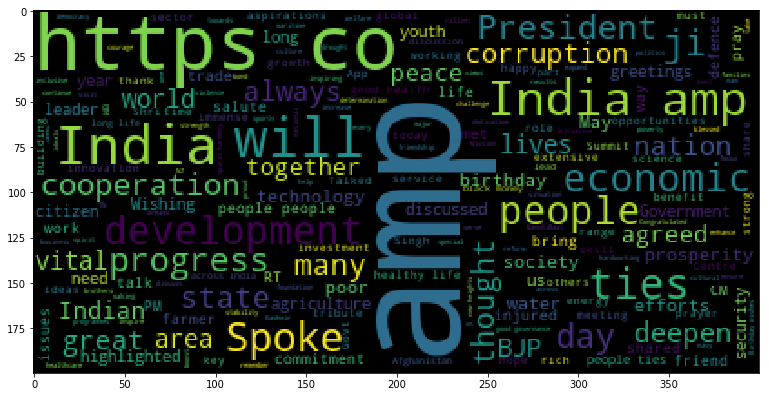

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_string = ' '.join(df3['text'])
wc = WordCloud(background_color='black').generate(input_string)
plt.figure(figsize=(13,8))
plt.imshow(wc)

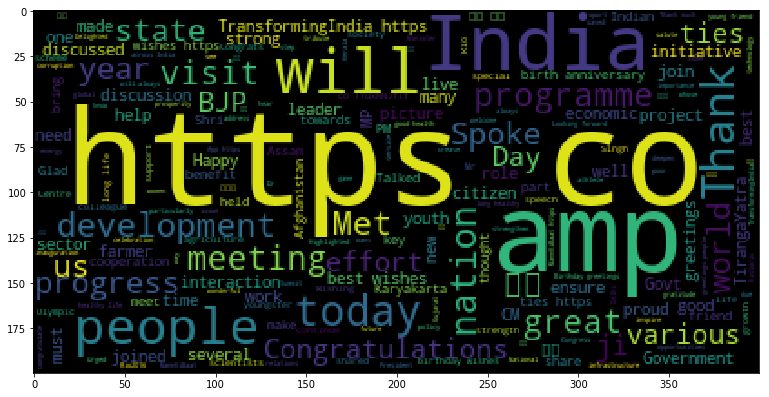

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

input_string = ' '.join(df4['text'])
wc = WordCloud(background_color='black').generate(input_string)
plt.figure(figsize=(13,8))
plt.imshow(wc)